# 서포트 벡터 머신

퍼셉트론은 가장 단순하고 빠른 판별 함수 기반 분류 모형이지만 판별 경계선(decision hyperplane)이 유니크하게 존재하지 않는다는 특징이 있다.

서포트 벡터 머신(SVM: support vector machine)은 퍼셉트론 기반의 모형에 가장 안정적인 판별 경계선을 찾기 위한 제한 조건을 추가한 모형이라고 볼 수 있다. 

* 퍼셉트론을 좋은 쪽으로 확장한 개념이다.

서포트 벡터 머신의 장점과 단점은 다음과 같다.

* 장점:
 * 독립 변수의 차원이 큰 경우 효율적
 * 메모리 사용량 적음
 * 다양한 커널 사용 가능

* 단점:
 * 데이터 수에 비해 차원이 너무 크면 성능 저하


<img src="https://datascienceschool.net/upfiles/632bf7973c904579954235a61cc340e1.png" style="width:100%; margin: 0 auto 0 auto;">

위 선의 3개가 에러펑션이 똑같다. 다 퍼펙트하게 나눈 것이 맞았다. 그런데 3가지가 다 되면 퍼셉트론을 돌렸을 때 어디서 멈출지 모른다. 그러면 저게 좋게 나누어진 것이냐? 아니다. 지금은 운이 좋아서 나누어졌지만 잘못될 경우에 걸쳐 있던 데이터가 넘어갈 수 있다. 그러면 가장 좋은 것은? 우측의 그림. 경계에서 조금 떨어진. 간격을 조금 둔 선. 이걸 그리려면 점과 선의 거리를 알아야 한다. 이것을 마진이라고 한다. SVM의 목표는 마진을 가장 크게 만드는 것이다. 마진은 저 최대한 걸쳐있는 데이터와 선과의 거리

## 마진

판별 함수 $f(z) = f(w^Tx-w_0)$ 를 가지는 판별 함수 기반 모형의 판별 경계선은 다음과 같이 주어진다.

$$ w^T x - w_0 = 0 $$

* w0는 원점과의 거리. 직선보다 더 멀리 있으면 +, 더 가까이 있으면 - 만나면 0
* 엑티베이션 함수. 바깥의 함수를 부르는 명칭. 사실은 w값을 아무거나 주면 된다. 스케일링만 잘 한다면

이 수식은 경계선에서 0이 된다는 조건만 지키면 되기 때문에 가장 가까운 클래스 +1의 표본 데이터 $x^{+}$과 가장 가까운 클래스 -1의 표본 데이터 $x^{-}$의 값이 각각 1과 -1이 되도록 스케일링(scaling)할 수 있다.


$$ w^T x^{+} - w_0 = +1 $$


$$ w^T x^{-} - w_0 = -1 $$


이 판별 경계선과 표본 데이터 $x^{+}$, $x^{-}$ 사이의 거리는 다음과 같이 주어진다.

$$ \dfrac{w^T x^{+} - w_0}{\| w \|} $$

$$ -\dfrac{w^T x^{-} - w_0}{\| w \|} $$

이 거리의 합을 마진(margin)이라고 하며 마진값이 클 수록 더 경계선이 안정적이라고 볼 수 있다. 그런데 위에서 정한 스케일링에 의해 마진은 다음과 같이 정리된다.

$$ \dfrac{w^T x^{+} - w_0}{\| w \|}  -\dfrac{w^T x^{-} - w_0}{\| w \|} = \dfrac{2}{\| w \|}$$

마진 값이 최대가 되는 경우는 $\| w \|$ 즉, $\| w \|^2$가 최소가 되는 경우와 같다. w를 최소화 하는 조건을 주는 reguralazion이다. 퍼셉트론에서 나온 개념

즉, 서포트 벡터 머신은 값을 최소화 하면서 모든 표본 데이터에 대해 다음 조건을 만족해야 한다.

$$ y \cdot \hat{y} = y \cdot( w^Tx - w_o)\geq 1 $$

$$  y \cdot ( w^Tx - w_o) - 1 \geq 0$$

Karush–Kuhn–Tucker 조건을 사용하면 최소화 목적 함수를 다음과 같이 고치면 된다.

$$ L = \dfrac{1}{2} ||w||^2 - \sum_{n=1}^N a_n (y_n \cdot ( w^Tx_n - w_o) - 1 ) $$


## Dual Form

위 함수를 $w$, $w_0$ 로 미분하여 기울기가 0이되는 조건을 구하면 다음과 같다.

$$ 
w = \sum_{n=1}^N a_n y_n x_n
$$

$$ 
0 = \sum_{n=1}^N a_n y_n 
$$

이 조건을 대입하여 $w$, $w_0$을 없애면 다음과 같은 문제가 된다.

$$
L =  \sum_{n=1}^N a_n - \dfrac{1}{2}\sum_{n=1}^N\sum_{m=1}^N a_n a_m y_n y_m x_n^T x_m
$$
이 때 $a$는 다음 조건을 만족한다.
$$
\sum_{n=1}^N a_n y_n = 0, \;\;\; a_n \geq 0   
$$
#경계선 조건이 된다.

이 문제는 $w$를 구하는 문제가 아니라 $a$를 구하는 문제로 바뀌었으므로 dual form 이라고도 한다.(L=~~~)


dual form 문제는 수치적으로 Box 제한 조건이 있는 이차 프로그래밍 문제(quadratic programming)가 되므로 적은 연산량으로 풀 수 있다.
2차원에서는 optimization(옵티미제이션_최적화)이 잘 된다. 옵티미제이션을 프로그래밍이라고 부르곤 한다. 그래서 프로그래밍해서 a로 돌아가서 w를 구하는 것이다.

## 서포트

dual form 문제를 풀어 함수 $L$ 를 최소화하는 $a$를 구하면 예측 모형을 다음과 같이 쓸 수 있다.

$$
y = w^T x - w_0 = \sum_{n=1}^N a_n y_n x_n^T x - w_0
$$


이차 프로그래밍(최적화)로 구한 $a_n = 0$ 이면 해당 데이터는 예측 모형, 즉 $w$ 계산에 아무런 기여를 하지 않는다는 것을 알 수 있다.

만약 $n$번째 데이터에 대해 $a_n > 0$ 이면 조건 만족을 위해 $y_n(w^Tx_n - w_o) = 1$이 된다. 즉 판별함수 값 $w^Tx_n - w_o = \pm 1$ 이다.

이러한 데이터를 서포트(support)라고 한다. 선과 가장 가까운 위치에 있는 점들을 서포트라고 한다. 이것들만 0이 아니고 나머지는 다 0이 된다. 0이 되는 것은 a가 0인 애들이다. 전체 데이터가 쭉 있으면 보통의 경우에는 2개의 가까운 점을 뽑아내는 것이다. 퍼셉트론처럼 몇십번, 몇백번 돌릴 필요 없이 몇번만 거의 원샷만 돌리면 10번 안에 찾는 것이 원리다. 속도가 엄청 빠르다. 수렴 속도가 빠르다. 서포트가 바뀔 일이 거의 없기 때문에 굉장히 robust하다.



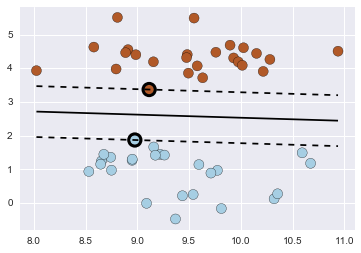

In [5]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2, random_state=4, cluster_std=0.60)

xmin = X[:, 0].min()
xmax = X[:, 0].max()
ymin = X[:, 1].min()
ymax = X[:, 1].max()
xx = np.linspace(xmin, xmax, 10)
yy = np.linspace(ymin, ymax, 10)
X1, X2 = np.meshgrid(xx, yy)

def plot_svm(model):
    Z = np.empty(X1.shape)
    for (i, j), val in np.ndenumerate(X1):
        x1 = val
        x2 = X2[i, j]
        p = model.decision_function([[x1, x2]])
        Z[i, j] = p[0]
    levels = [-1.0, 0.0, 1.0]
    linestyles = ['dashed', 'solid', 'dashed']
    plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap = plt.cm.Paired)
    plt.contour(X1, X2, Z, levels, colors='k', linestyles=linestyles)
    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=150, linewidths=3, facecolors='none')
    plt.show()
    
from sklearn.svm import SVC

model = SVC(kernel='linear').fit(X, y)
plot_svm(model)

In [6]:
x_new = [10, 2]
model.decision_function([x_new])

array([-0.70648511])

In [7]:
model.coef_.dot(x_new) + model.intercept_

array([-0.70648511])

In [9]:
model.support_vectors_   #서포트 포인트를 가지고 있다.

array([[ 8.97646441,  1.87283258],
       [ 9.11476202,  3.37056244]])

In [10]:
model.support_   #여기에 index를 가지고 있다. 42번째랑 1번째라는 의미. 서포트는 a가 0이 아닌값

array([42,  1])

In [11]:
y[model.support_]

array([0, 1])

In [13]:
# dual_coef_ = y_i \alpha_i
model.dual_coef_[0][0] * model.support_vectors_[0].dot(x_new) + \
model.dual_coef_[0][1] * model.support_vectors_[1].dot(x_new) + \
model.intercept_

array([-0.70648511])

In [14]:
y[model.support_][1]

1

In [15]:
model.n_support_ 

array([1, 1])

## 슬랙 변수

만약 데이터가 직선인 판별 경계선으로 나누어지지 않는 즉, 선형 분리(linear separable)가 불가능 한 경우에는 다음과 같이 슬랙 변수(slack variable)를 사용하여 개별적인 오차를 허용할 수 있다.

원래 판별 함수의 값은,

클래스 $+1$ 영역의 샘플 $x_{+}$에 대해 

$$ w^Tx_{+} - w_0 \geq 1 $$  

클래스 $-1$ 영역의 샘플 $x_{-}$에 대해 
 
$$ w^Tx_{-} - w_0 \leq -1 $$

이어야 한다.
 

양수인 슬랙 변수 $\xi \geq 0 $를 사용하면 이 조건을 다음과 같이 완화할 수 있다.  저 기호는 크싸이 라고 읽는다. 포인트마다 봐주는 정도가 다르다. 0은 안 봐줘도 되는 경우. 가장 좋은 경우. 봐주지 않을 경우에는 깨끗하게 나누어질수 없는 경우이다.


$$ w^Tx_{+} - w_0 \geq +1-\xi_i $$

$$ w^Tx_{-} - w_0 \leq -1+\xi_i $$

$$ \xi \geq 0 $$

대신 슬랙 변수의 크기를 제한해야 하므로 위의 부등식 조건을 모두 고려한 최적화 목적 함수는 다음과 같아진다.

$$ 
L = \dfrac{1}{2} ||w||^2 - \sum_{n=1}^N a_n (y_n \cdot ( w^Tx_n - w_o) - 1 + \xi_n ) - \sum_{n=1}^N \mu_n \xi_n  + C \sum_{n=1}^N \xi_n    $$

봐주는 데도 한도가 있는데 봐주는 것에 대한 패널티로 맨 끝에 C~ 로 넣어준다. 작은게 좋기 때문에 비중을 맞춰주기 위해서 더해준다. 그러면 C가 크면 패널티가 안주겠다. 안 생기게 하겠다. 왼쪽의 그림. 반대로 C가 작으면 패널티를 완전 주겠다. 그만큼 마진이 커지기 때문에 미스클래시피케이션이 늘어나는 대신에 더 안정적이 된다. 이 개념은 외워라


<img src="https://datascienceschool.net/upfiles/d5735e8d8db342858166a790f108e8fc.png" style="width:100%; margin: 0 auto 0 auto;">

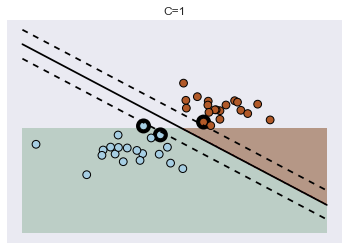

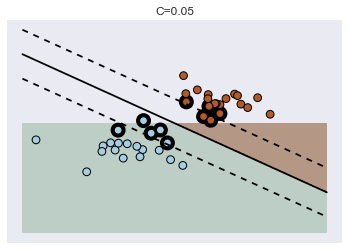

In [17]:
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
Y = [0] * 20 + [1] * 20

fignum = 1
for name, penalty in (('C=1', 1), ('C=0.05', 0.05)):
    clf = SVC(kernel='linear', C=penalty).fit(X, Y)
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(-5, 5)
    yy = a * xx - (clf.intercept_[0]) / w[1]
    margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
    yy_down = yy + a * margin
    yy_up = yy - a * margin
    
    plt.figure(fignum)
    
    x_min = -5
    x_max = 5
    y_min = -9
    y_max = 0
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200J]
    Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])
    Z = Z.reshape(XX.shape)
    plt.contourf(XX, YY, Z, cmap=plt.cm.Accent, alpha=0.6)
    
    plt.plot(xx, yy, 'k-')
    plt.plot(xx, yy_down, 'k--')
    plt.plot(xx, yy_up, 'k--')
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=120, linewidths=4, facecolors='none')
    plt.scatter(X[:, 0], X[:, 1], c=Y, s=60, linewidths=1, cmap=plt.cm.Paired)
    
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.title(name)
    plt.axis('tight')
    plt.show()
    
    fignum = fignum + 1;

C를 줄이면 패널티를 주는 것이기 때문에 밑의 그림처럼 까만애들을 다 보고 주겠다. 그래서 계산량이 더 많아진다. 그래서 안정성이 더 커진다. 2개만 볼 경우에는 값이 조금만 바뀌어도 훅훅 바뀌기 때문에 불안정

## 얼굴 이미지 인식

이미지의 경우 피처가 크고 뭉쳐있는 특성이 크다. 소리의 경우에도. 사람의 음성에서도 공간상에서 클러스터링이 잘 된다. 그래서 SVM으로 얼굴, 음성, 그림 인식에 용이하다.

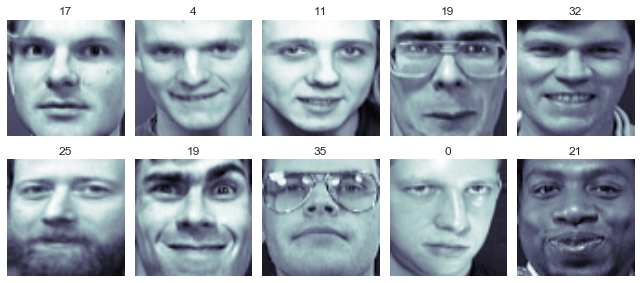

In [19]:
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()

N=2; M=5;
np.random.seed(0)
fig = plt.figure(figsize=(9,5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
klist = np.random.choice(range(len(faces.data)), N * M)
for i in range(N):
    for j in range(M):
        k = klist[i*M+j]
        ax = fig.add_subplot(N, M, i*M+j+1)
        ax.imshow(faces.images[k], cmap=plt.cm.bone);
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title(faces.target[k])
plt.tight_layout()
plt.show()

In [20]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, test_size=0.25, random_state=0)

In [21]:
from sklearn.svm import SVC
svc_1 = SVC(kernel='linear').fit(X_train, y_train)

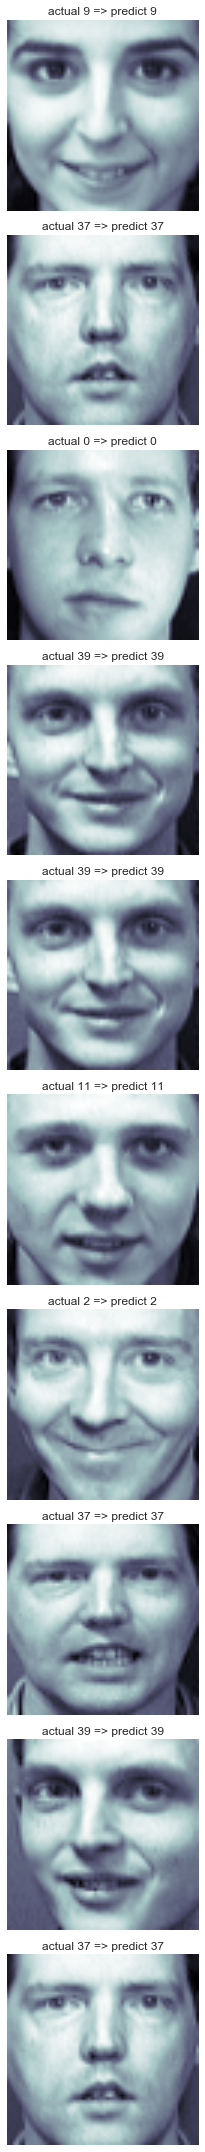

In [22]:
fig = plt.figure(figsize=(3, 30))
for i, k in enumerate(np.random.choice(len(y_test), 10)):
    ax = fig.add_subplot(10, 1, i + 1)
    ax.imshow(X_test[k:(k+1), :].reshape(64, 64), cmap=plt.cm.bone);
    ax.grid(False)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
    plt.title("actual %d => predict %d" % (y_test[k], svc_1.predict(X_test[k:(k+1), :])[0]))
plt.tight_layout()
plt.show()

In [23]:
glasses = [
    ( 10,  19), ( 30,  32), ( 37,  38), ( 50,  59), ( 63,  64),
    ( 69,  69), (120, 121), (124, 129), (130, 139), (160, 161),
    (164, 169), (180, 182), (185, 185), (189, 189), (190, 192),
    (194, 194), (196, 199), (260, 269), (270, 279), (300, 309),
    (330, 339), (358, 359), (360, 369)
]

def create_target(segments):
    y = np.zeros(faces.target.shape[0])
    for (start, end) in segments:
        y[start:end + 1] = 1
    return y

target_glasses = create_target(glasses)
X_train, X_test, y_train, y_test = train_test_split(faces.data, target_glasses, test_size=0.25, random_state=0)

In [24]:
svc_2 = SVC(kernel='linear').fit(X_train, y_train)

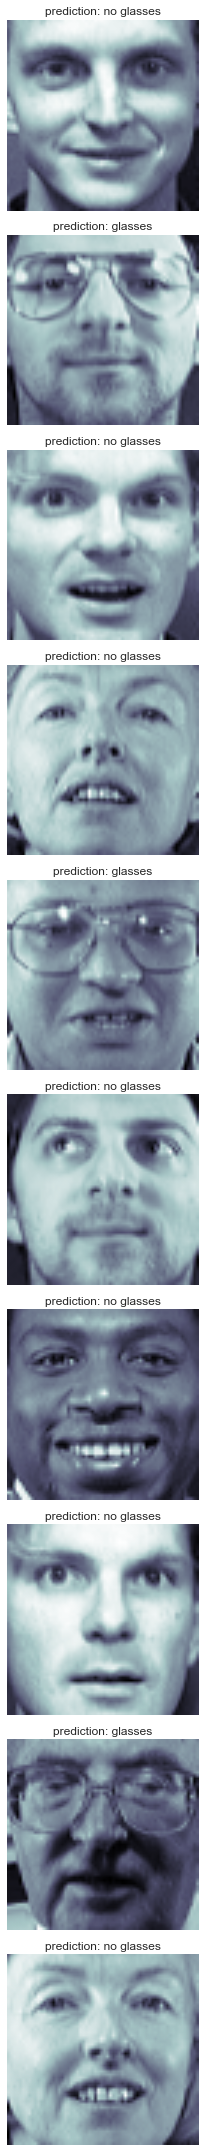

In [26]:
fig = plt.figure(figsize=(3, 30))
for i, k in enumerate(np.random.choice(len(y_test), 10)):
    ax = fig.add_subplot(10, 1, i + 1)
    ax.imshow(X_test[k:k+1, :].reshape(64, 64), cmap=plt.cm.bone);
    ax.grid(False)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
    plt.title("prediction: %s" % ("glasses" if (svc_2.predict(X_test[k:(k+1), :])[0]) else "no glasses"))
plt.tight_layout()
plt.show()

# 실습

In [27]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.cross_validation import train_test_split
from sklearn.svm import SVC
faces = fetch_olivetti_faces()
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, test_size=0.25, random_state=0)
svc_1 = SVC(kernel='linear').fit(X_train, y_train)

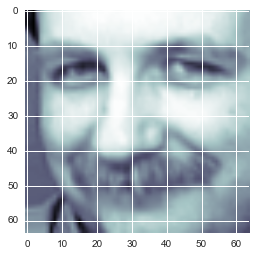

In [28]:
k = 50
plt.imshow(X_test[k:(k+1), :].reshape(64, 64), cmap=plt.cm.bone)

In [29]:
svc_1.predict(X_test[k:(k+1)])

array([24])

In [32]:
classification_report?

Object `classification_report` not found.


In [33]:
from sklearn.metrics import classification_report

In [34]:
print(classification_report(y_test, svc_1.predict(X_test)))

             precision    recall  f1-score   support

          0       0.86      1.00      0.92         6
          1       1.00      1.00      1.00         4
          2       1.00      1.00      1.00         2
          3       1.00      1.00      1.00         1
          4       1.00      1.00      1.00         1
          5       1.00      1.00      1.00         5
          6       1.00      1.00      1.00         4
          7       1.00      0.67      0.80         3
          9       1.00      1.00      1.00         1
         10       1.00      1.00      1.00         4
         11       1.00      1.00      1.00         1
         12       1.00      1.00      1.00         2
         13       1.00      1.00      1.00         3
         14       1.00      1.00      1.00         5
         15       1.00      1.00      1.00         3
         17       1.00      1.00      1.00         6
         19       1.00      1.00      1.00         4
         20       1.00      1.00      1.00   

* SVM, 나이브베이지안, 랜덤포레스트
 * 디시전 트리를 확장한 개념 이거 3가지만 알면 분류는 거의 다 배우고 적용 가능하다.
 * 남은 것은 이것을 조금씩 조금씩 변형한 것이다. 또 해야 할 작업은 튜닝이다. 정규화하는 방법들도 같이
* 다음은 커널 SVM. 도넛 안에 도넛이 있을 경우에는 선으로 해결할 수 없는 문제이다. 